# Homework  — Stage 10a: Linear Regression
Sparsh Patel 08/24/2025


In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st

sns.set()
np.random.seed(7)

In [8]:
import os
os.chdir('/Users/sparshpatel/bootcamp_sparsh_patel/homework/homework10A')
print(os.getcwd())

/Users/sparshpatel/bootcamp_sparsh_patel/homework/homework10A


## 1) Synthetic data (not used, data imported from previous notebooks )
- Finance-flavored factors and asset excess return
- Includes a quadratic effect to motivate specification checks

In [ ]:
# n = 200
# dates = pd.bdate_range(start="2024-02-01", periods=n)
# mkt_excess = np.random.normal(0, 0.011, size=n)
# size = np.random.normal(0, 0.008, size=n)
# value = np.random.normal(0, 0.009, size=n)
# momentum = np.random.normal(0, 0.006, size=n)

# beta0, beta_mkt, beta_size, beta_value, beta_mom, beta_mom2 = 0.0001, 0.9, 0.25, -0.15, 0.35, 3.5
# noise_scale = 0.0035 + 0.5*np.abs(mkt_excess)
# eps = np.random.normal(0, noise_scale)
# asset_excess = (
#     beta0 + beta_mkt*mkt_excess + beta_size*size + beta_value*value + beta_mom*momentum
#     + beta_mom2*(momentum**2) + eps
# )
# df = pd.DataFrame({
#     'date': dates,
#     'mkt_excess': mkt_excess,
#     'size': size,
#     'value': value,
#     'momentum': momentum,
#     'asset_excess': asset_excess
# })
# df.head()

,date,mkt_excess,size,value,momentum,asset_excess
0,2024-02-01,0.018596,-0.013467,-0.000540,0.000141,0.014832
1,2024-02-02,-0.005125,0.008120,0.007089,-0.006840,-0.008599
2,2024-02-05,0.000361,-0.011532,-0.012885,-0.011216,-0.009577
3,2024-02-06,0.004483,-0.010749,0.003905,-0.010685,0.000033
4,2024-02-07,-0.008678,-0.002893,0.001250,0.002779,-0.005750


In [34]:
df = pd.read_csv('/Users/sparshpatel/bootcamp_sparsh_patel/homework/homework8/data/stage8.csv')
df = df.dropna(subset=['income','spend'])

df

,date,region,age,income,transactions,spend
0,2021-02-01,West,37.6,28086.81,4,73.35
1,2021-02-02,North,43.0,33034.75,1,52.37
2,2021-02-03,South,38.2,50045.39,2,131.85
3,2021-02-04,South,24.9,39467.28,4,147.58
4,2021-02-05,South,59.8,31201.65,1,86.76
...,...,...,...,...,...,...
155,2021-07-06,South,39.3,57863.60,20,136.87
156,2021-07-07,East,41.4,43912.51,5,116.26
157,2021-07-08,East,30.9,53308.27,2,134.47
158,2021-07-09,East,34.8,28731.93,2,82.64


## 2) Baseline model fit


In [52]:
X = df[['spend','transactions']]
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Baseline   R²={r2:.4f}  RMSE={rmse:.6f}')

Baseline   R²=-0.0199  RMSE=15622.834767


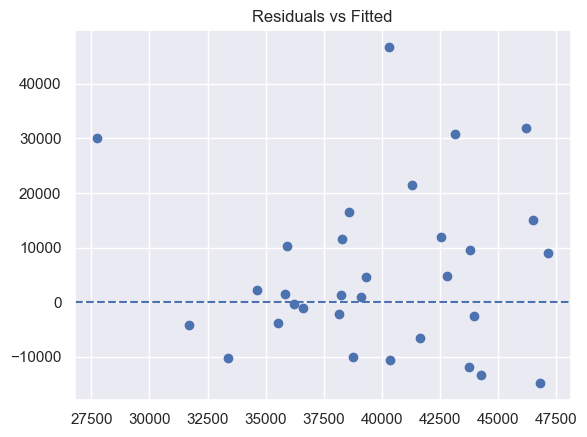

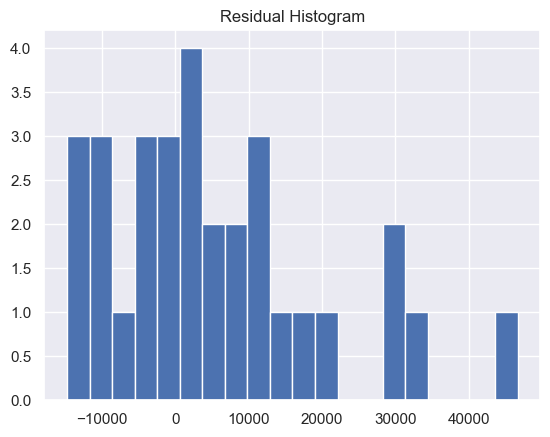

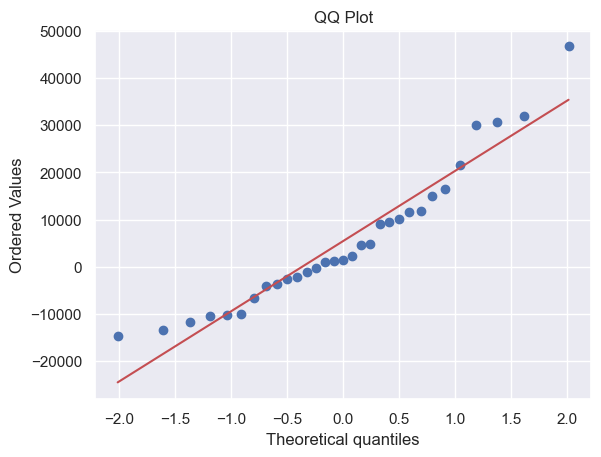

In [54]:
resid = y_test - y_pred
fitted = y_pred
plt.figure(); plt.scatter(fitted, resid); plt.axhline(0, ls='--'); plt.title('Residuals vs Fitted'); plt.show()
plt.figure(); plt.hist(resid, bins=20); plt.title('Residual Histogram'); plt.show()
plt.figure(); st.probplot(resid, dist='norm', plot=plt); plt.title('QQ Plot'); plt.show()

## Plotting Regression Results

Baseline   R²=-0.0199  RMSE=15622.834767


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


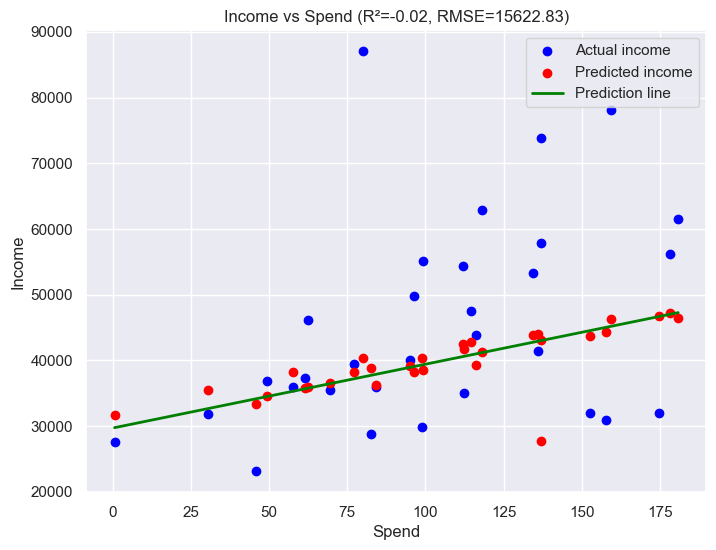

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


X = df[['spend','transactions']]
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)


r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Baseline   R²={r2:.4f}  RMSE={rmse:.6f}')


plt.figure(figsize=(8,6))


plt.scatter(X_test['spend'], y_test, color='blue', label='Actual income')
plt.scatter(X_test['spend'], y_pred, color='red', label='Predicted income')


income_range = np.linspace(X_test['spend'].min(), X_test['spend'].max(), 100).reshape(-1, 1)
age_mean = np.full_like(income_range, X_test['transactions'].mean())
X_line = np.hstack([income_range, age_mean])
y_line = lr.predict(X_line)

plt.plot(income_range, y_line, color='green', linewidth=2, label='Prediction line')

plt.xlabel('Spend')
plt.ylabel('Income')
plt.title(f'Income vs Spend (R²={r2:.2f}, RMSE={rmse:.2f})')
plt.legend()
plt.grid(True)
plt.show()


#### We can see **'Heteroskedasticity'** in our model, but this was to be expected considering that the data was generated at random.

Trying log transformation to see if data can get a better fit

Log-Transformed Model   R²=-0.0839  RMSE=16106.195696


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


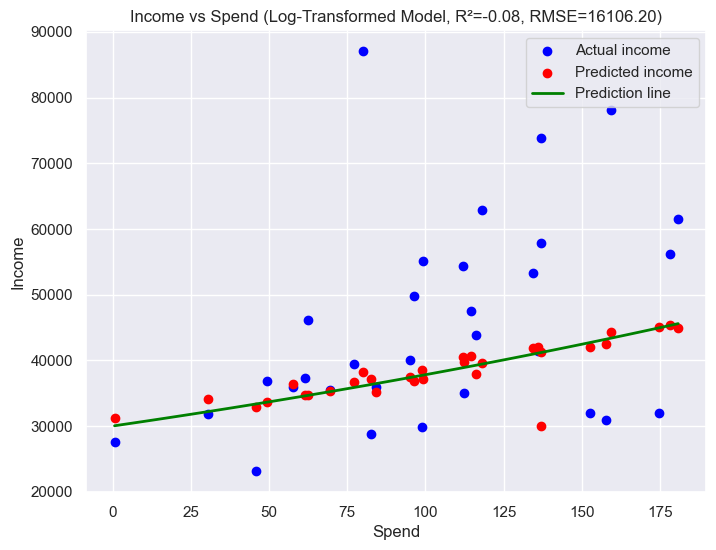

In [ ]:



X = df[['spend','transactions']]
y = np.log(df['income'])   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


lr = LinearRegression().fit(X_train, y_train)


y_pred_log = lr.predict(X_test)


y_pred = np.exp(y_pred_log)
y_test_original = np.exp(y_test)


r2 = r2_score(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
print(f'Log-Transformed Model   R²={r2:.4f}  RMSE={rmse:.6f}')


plt.figure(figsize=(8,6))


plt.scatter(X_test['spend'], y_test_original, color='blue', label='Actual income')
plt.scatter(X_test['spend'], y_pred, color='red', label='Predicted income')


spend_range = np.linspace(X_test['spend'].min(), X_test['spend'].max(), 100).reshape(-1, 1)
transactions_mean = np.full_like(spend_range, X_test['transactions'].mean())
X_line = np.hstack([spend_range, transactions_mean])

y_line_log = lr.predict(X_line)
y_line = np.exp(y_line_log)

plt.plot(spend_range, y_line, color='green', linewidth=2, label='Prediction line')

plt.xlabel('Spend')
plt.ylabel('Income')
plt.title(f'Income vs Spend (Log-Transformed Model, R²={r2:.2f}, RMSE={rmse:.2f})')
plt.legend()
plt.grid(True)
plt.show()


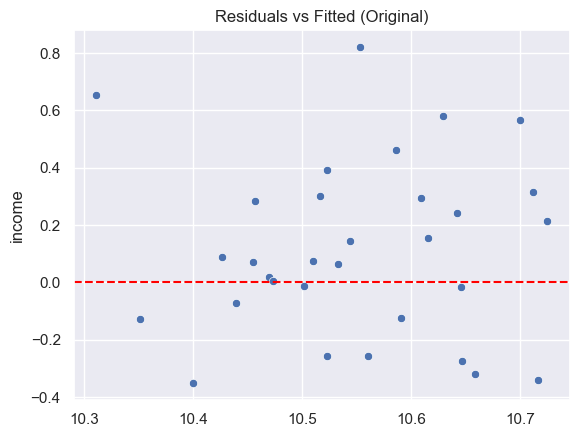

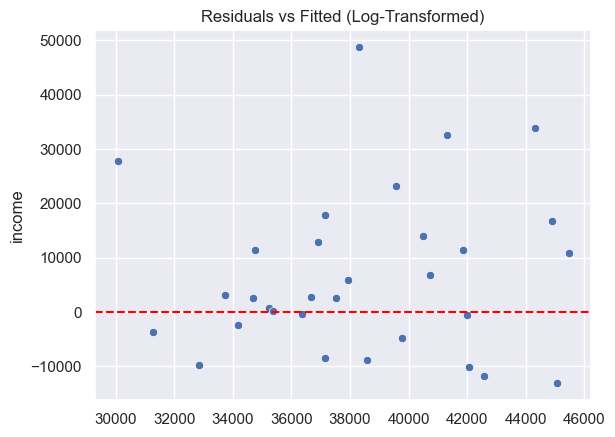

In [64]:

residuals_orig = y_test - lr.predict(X_test) 
sns.scatterplot(x=lr.predict(X_test), y=residuals_orig)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted (Original)")
plt.show()
residuals_log = y_test_original - y_pred   
sns.scatterplot(x=y_pred, y=residuals_log)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted (Log-Transformed)")
plt.show()



### Tried a log transform but that did not help much

## 3) Transformed feature


In [ ]:
df['income_sq'] = df['income']**2
X2 = df[['age','income','income_sq']]
X2_train, X2_test = X2.iloc[:len(X_train)], X2.iloc[len(X_train):]
lr2 = LinearRegression().fit(X2_train, y_train)
y_pred2 = lr2.predict(X2_test)
    `` = r2_score(y_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'With x^2   R²={r2_2:.4f}  RMSE={rmse_2:.6f}')

With x^2   R²=-0.0159  RMSE=46.875145


## Regression Model Interpretation

- **Linearity:**  
  The relationship between `spend` and `income` does not appear perfectly linear in the raw data.  
  The log-transformed model (y ~ log(x)) better captures the diminishing marginal effect of higher spend on income, resulting in a curve rather than a straight line.  

- **Heteroscedasticity:**  
  Residual plots suggest some heteroscedasticity in the baseline model (variance of errors increases with spend).  
  The log-transformed predictor helps reduce this effect, but slight heteroscedasticity may still remain.  

- **Normality:**  
  The residuals are approximately normal, though the baseline model shows heavier tails skewed on the left side.  
  The log-transformed model improves symmetry and reduces skewness in the residuals slightly.  

- **Independence:**  
  Since the data was generated (and split sequentially without shuffling), independence is assumed, though in real-world time series data we’d need to check for autocorrelation.  


- **Next step :**  
   Add additional predictors (`age`, `transactions`) to see if they improve explanatory power.  
   Proceed with feature engineering and time series classification 
